<a href="https://colab.research.google.com/github/mukulsingh11/Shipment-Price-Prediction/blob/main/Shipment_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset

In this data science project, you will build a machine learning system that will be able to predict the cost of the shipment or package by using machine learning algorithms. This project will be very useful for logistics companies, where on a day-to-day basis a lot of couriers, packages, or goods are transported via different modes of transport. The main concern with these logistics companies is trying to deliver these goods in an efficient and cost-efficient way possible, so the pricing of the shipment is tricky and involves a lot of variables to consider while the pricing of the shipment. There might be scenarios where the shipment might be delayed due to some external reasons, leading to a loss for the company and a delay in delivery of the shipment. So logistics companies need to use dynamic pricing based on several factors and variables to price the shipment in such a way that there are no losses to the company and the price of the shipment is as less as possible so that customers can use their services more due to effective pricing rates.

Problem Statement:

The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.
The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.
Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [ ]:
!git clone https://github.com/alinegorischf/Shipment-Price-Prediction

Cloning into 'Shipment-Price-Prediction'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 29 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 1.14 MiB | 4.77 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!pip install geopandas

In [12]:
# Display all the dataset
pd.pandas.set_option('display.max_columns', None)

In [13]:
data = '/content/Shipment-Price-Prediction/dataset/SCMS_Delivery_History_Dataset.csv'
read = pd.read_csv(data)
read

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,1138

### Check the data

In [14]:
df = pd.read_csv('/content/Shipment-Price-Prediction/dataset/SCMS_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [15]:
# Verify the data variables and the data type an if there is null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [16]:
# check the columns of dataset
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [17]:
# check the shape of datasets
df.shape

(10324, 33)

In [19]:
# check the missing value

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

* it is indicated the three columns are missing value

In [27]:
# check the missing value of percentage

(df.isnull().mean()*100).sort_values(ascending=False)

Dosage                          16.815188
Shipment Mode                    3.487021
Line Item Insurance (USD)        2.779930
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0.000000
Line Item Quantity               0.000000
Line Item Value                  0.000000
Vendor                           0.000000
Pack Price                       0.000000
Unit Price                       0.000000
Manufacturing Site               0.000000
First Line Designation           0.000000
Weight (Kilograms)               0.000000
Freight Cost (USD)               0.000000
Item Description                 0.000000
ID                               0.000000
Project Code                     0.000000
Product Group                    0.000000
Delivery Recorded Date           0.000000
Delivered to Client Date         0.000000
Scheduled Delivery Date          0.000000
PO Sent to Vendor Date           0

In [28]:
# check the total missing value
df.isnull().sum().sum()

2383

In [32]:
# drop the columns
df = df.drop('ID',axis=1)

In [33]:
# check the unique value
df.nunique()

Project Code                     142
PQ #                            1237
PO / SO #                       6233
ASN/DN #                        7030
Country                           43
Managed By                         4
Fulfill Via                        2
Vendor INCO Term                   8
Shipment Mode                      4
PQ First Sent to Client Date     765
PO Sent to Vendor Date           897
Scheduled Delivery Date         2006
Delivered to Client Date        2093
Delivery Recorded Date          2042
Product Group                      5
Sub Classification                 6
Vendor                            73
Item Description                 184
Molecule/Test Type                86
Brand                             48
Dosage                            54
Dosage Form                       17
Unit of Measure (Per Pack)        31
Line Item Quantity              5065
Line Item Value                 8741
Pack Price                      1175
Unit Price                       183
M

In [38]:
# check the unique value in ascending order
df.nunique().sort_values(ascending=False)

Line Item Value                 8741
ASN/DN #                        7030
Freight Cost (USD)              6733
Line Item Insurance (USD)       6722
PO / SO #                       6233
Line Item Quantity              5065
Weight (Kilograms)              4688
Delivered to Client Date        2093
Delivery Recorded Date          2042
Scheduled Delivery Date         2006
PQ #                            1237
Pack Price                      1175
PO Sent to Vendor Date           897
PQ First Sent to Client Date     765
Item Description                 184
Unit Price                       183
Project Code                     142
Manufacturing Site                88
Molecule/Test Type                86
Vendor                            73
Dosage                            54
Brand                             48
Country                           43
Unit of Measure (Per Pack)        31
Dosage Form                       17
Vendor INCO Term                   8
Sub Classification                 6
P

Text(0.5, 1.0, 'Cardinality')

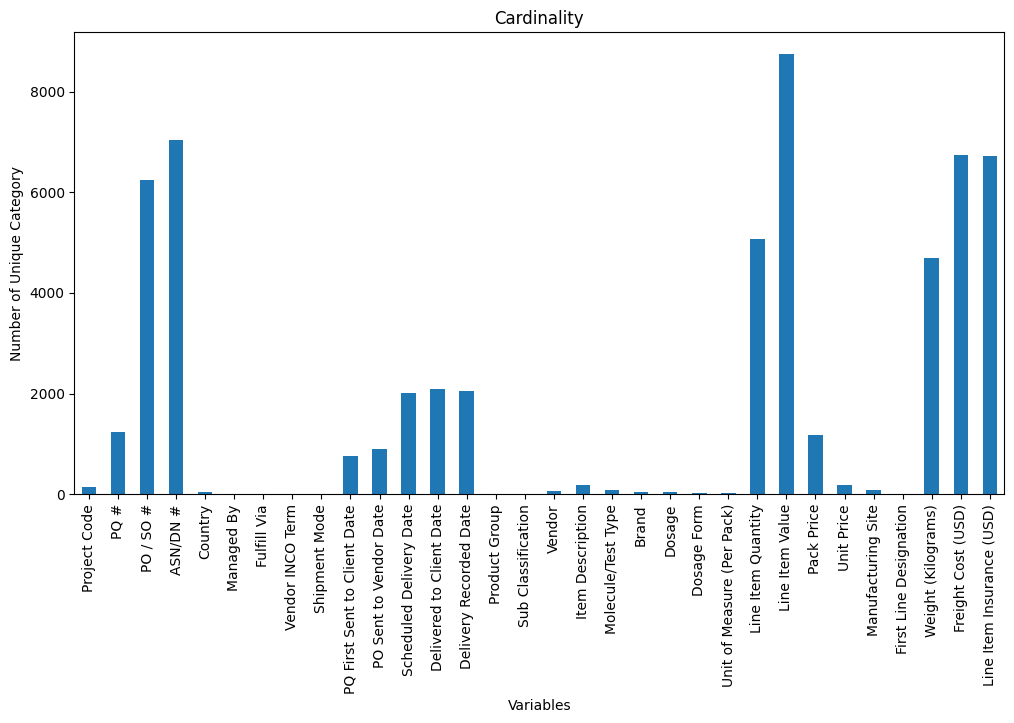

In [34]:
# show the unique value in graph
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of Unique Category')
plt.xlabel('Variables')
plt.title('Cardinality')


In [39]:
# check the duplicated values
df.duplicated().sum()

4

In [41]:
df[df.duplicated]

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)


In [42]:
# drop the duplicated values
df = df.drop_duplicates()

In [43]:
# check the shape of dataset after drop the duplicated value

df.shape

(10320, 32)

In [47]:
# Getting the count of each category from data
for feature in df.columns:
    print(df[feature].value_counts())

116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
100-SN-T01      1
201-UG-T30      1
100-GN-T30      1
A02-SN-T50      1
104-SZ-T30      1
Name: Project Code, Length: 142, dtype: int64
Pre-PQ Process    2678
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-12933            1
FPQ-6823             1
FPQ-15736            1
FPQ-6128             1
FPQ-16523            1
Name: PQ #, Length: 1237, dtype: int64
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: PO / SO #, Length: 6233, dtype: int64
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: ASN/DN #, Length: 7030, dtype: int64
Sou

In [48]:
# Checking the count of each categories from unique data
for feature in df.columns:
    print(df[feature].unique())

['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01'
 '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01' '141-NA-T01'
 '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01' '100-SN-T01'
 '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01' '100-ZW-T01'
 '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01' '100-GH-T01'
 '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01' '151-NG-T30'
 '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01' '102-KE-T30'
 '108-VN-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SZ-T30' '114-UG-T30' '105-DO-T30' '113-ZW-T30' '103-CM-T30'
 '109-TZ-T30' '800-CM-T30' '100-BJ-T30' '117-ET-T30' '900-TZ-T30'
 '112-NG-T

* it is indicated the Weight (Kilograms) columns are some error value and
  Freight Cost (USD) are also error value. We need a clean data
  

In [56]:
df['Weight (Kilograms)']

0                                13
1                               358
2                               171
3                              1855
4                              7590
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 10320, dtype: object

In [57]:
df['Freight Cost (USD)']

0                                    780.34
1                                    4521.5
2                                   1653.78
3                                  16007.06
4                                  45450.08
                        ...                
10319               See DN-4307 (ID#:83920)
10320               See DN-4313 (ID#:83921)
10321    Freight Included in Commodity Cost
10322    Freight Included in Commodity Cost
10323    Freight Included in Commodity Cost
Name: Freight Cost (USD), Length: 10320, dtype: object

In [59]:
df['PO Sent to Vendor Date']

0        Date Not Captured
1        Date Not Captured
2        Date Not Captured
3        Date Not Captured
4        Date Not Captured
               ...        
10319       N/A - From RDC
10320       N/A - From RDC
10321       N/A - From RDC
10322       N/A - From RDC
10323       N/A - From RDC
Name: PO Sent to Vendor Date, Length: 10320, dtype: object